# Predicting the Sale Price of Bulldozers using Machine learning

## 1. Problem definition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2.Data

The data is downoladed from the Kaggle Bluebook for Bulldozers competition:
https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012.
* Test.csv is the test set. It contains data from May 1, 2012 - November 2012.

## 3. Evaludation

The evaluation metric is the RMSLE (root mean squared log error) between the actual and predicted auction prices. 

Goal for the this project is to crate a model with minimum RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset.

In [31]:
import pandas as pd
features = pd.read_excel("data/Data Dictionary.xlsx")
pd.set_option('display.max_colwidth', None)
features.drop('Unnamed: 2', axis=1)

c:\MLandDS\bulldozer_pricing_project\env\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Variable,Description
0,SalesID,unique identifier of a particular sale of a machine at auction
1,MachineID,identifier for a particular machine; machines may have multiple sales
2,ModelID,identifier for a unique machine model (i.e. fiModelDesc)
3,datasource,source of the sale record; some sources are more diligent about reporting attributes of the machine than others. Note that a particular datasource may report on multiple auctioneerIDs.
4,auctioneerID,"identifier of a particular auctioneer, i.e. company that sold the machine at auction. Not the same as datasource."
5,YearMade,year of manufacturer of the Machine
6,MachineHoursCurrentMeter,current usage of the machine in hours at time of sale (saledate); null or 0 means no hours have been reported for that sale
7,UsageBand,"value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel; e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel."
8,Saledate,time of sale
9,Saleprice,cost of sale in USD


In [32]:
# Import tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [33]:
# Import training and validation set
df_temp = pd.read_csv("data/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

In [34]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [35]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

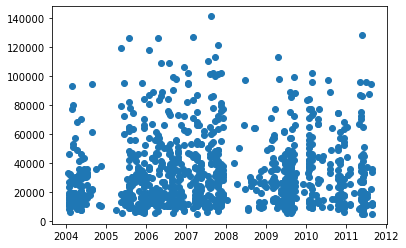

In [36]:
fig , ax = plt.subplots()
ax.scatter(df_temp["saledate"][:1000], df_temp["SalePrice"][:1000]);

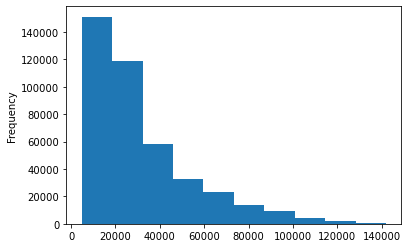

In [37]:
df_temp.SalePrice.plot.hist();

### Parsing dates

In [38]:
df_temp.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

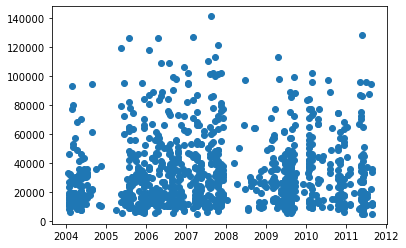

In [39]:
fig , ax = plt.subplots()
ax.scatter(df_temp["saledate"][:1000], df_temp["SalePrice"][:1000]);

### Sort DataFrame by saledate


In [40]:
# Sort DataFrame in data order
df_temp.sort_values(by=["saledate"], inplace=True, ascending=True)

### Adding datetime parameters for `saledate` column

In [41]:
from utils import add_datetime_parameters
add_datetime_parameters(df_temp, "saledate", drop_column=True)

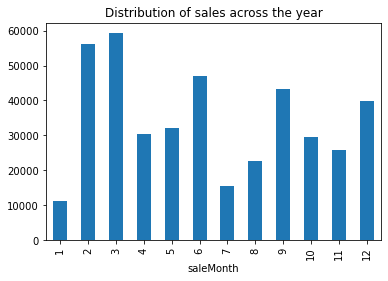

In [42]:
asdf = df_temp.groupby(["saleMonth"])
asdf["SalesID"].count().plot.bar(title="Distribution of sales across the year");

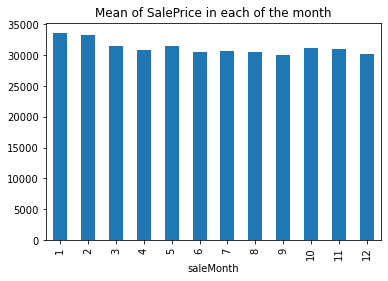

In [43]:
asdf.SalePrice.mean().plot.bar(title="Mean of SalePrice in each of the month");

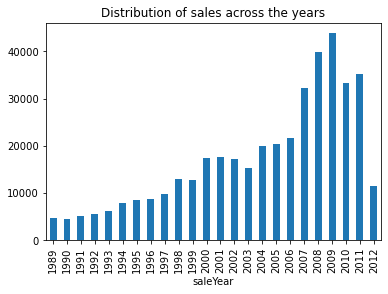

In [44]:
asdf = df_temp.groupby(["saleYear"])
asdf["SalesID"].count().plot.bar(title="Distribution of sales across the years");

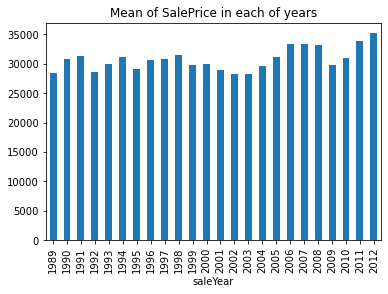

In [45]:
asdf.SalePrice.mean().plot.bar(title="Mean of SalePrice in each of years");

## 5. Modeling
There's more of EDA that could be done but there's a lot of features and searching for patterns in all of them will be time-consuming. Let's move to model driven EDA and back to data driven EDA in case modeling fail.

### Convert Strings to categories

In [46]:
from utils import find_string_columns, convert_strings_into_categories

# Turn all of the string values into category values
convert_strings_into_categories(df_temp)

### Fill missing values

#### Filling missing categorical features and turning them into numbers

In [47]:
# Check for columns which aren't numeric
from utils import find_categorical_columns
missing_cat_train = find_categorical_columns(df_temp)

In [48]:
# Turn categorical variables into numbers and fill missing
for cat in missing_cat_train:
    # Add binary column to indicate whether sample had missing value
    df_temp[cat+"_is_missing"] = df_temp[cat].isnull()
    # Turn categories into numbers and add +1
    df_temp[cat] = pd.Categorical(df_temp[cat]).codes + 1

#### Split into train and validation data

In [49]:
df_train_temp = df_temp[df_temp.saleYear != 2012]
df_valid_temp = df_temp[df_temp.saleYear == 2012]

#### Save preprocessed data

In [50]:
df_train_temp.to_csv("data/train_temp.csv", index=False)
df_valid_temp.to_csv("data/valid_temp.csv", index=False)


#### Load preprocesed data

In [51]:
df_train_temp = pd.read_csv("data/train_temp.csv", low_memory=False)
df_valid_temp = pd.read_csv("data/valid_temp.csv", low_memory=False)

#### Fill numeric values

In [52]:
from utils import find_numeric_columns
numeric_cols_train = find_numeric_columns(df_train_temp)
numeric_cols_valid = find_numeric_columns(df_valid_temp)

In [53]:
# fill missing data with median
for col in numeric_cols_train:
    if df_train_temp[col].isnull().sum():
        # Add a binary column which tells us is the data was missing or not
        df_train_temp[col+"_is_missing"] = df_train_temp[col].isnull()
        # Fill missing numeric values with median
        df_train_temp[col].fillna(df_train_temp[col].median(), inplace=True)
        
for col in numeric_cols_valid:
    if df_valid_temp[col].isnull().sum():
        # Add a binary column which tells us is the data was missing or not
        df_valid_temp[col+"_is_missing"] = df_valid_temp[col].isnull()
        # Fill missing numeric values with median
        df_valid_temp[col].fillna(df_valid_temp[col].median(), inplace=True)

In [54]:
# Check again for missing numeric values
for col in numeric_cols_train:
    print(df_train_temp[col].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [55]:
for col in numeric_cols_valid:
    print(df_valid_temp[col].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [56]:
df_train_temp.auctioneerID_is_missing.value_counts()

False    380989
True      20136
Name: auctioneerID_is_missing, dtype: int64

### All data is numeric and filled. Now time for creating the baseline models.

In [58]:
# import models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

# create baseline models
models_1 = {
    "RandomForestRegressor" : RandomForestRegressor(n_jobs=-1)
}


In [59]:

# split X_train, X_valid, y_train, y_valid
X_train = df_train_temp.drop("SalePrice", axis=1)
y_train = df_train_temp["SalePrice"]

X_valid = df_valid_temp.drop("SalePrice", axis=1)
y_valid = df_valid_temp["SalePrice"]

In [32]:
from utils import fit_and_score
fit_and_score(models_1, X_train[:1000], X_valid[:1000], y_train[:1000], y_valid[:1000], type_of_problem="regression")

ValueError: X has 101 features, but DecisionTreeRegressor is expecting 102 features as input.

In [60]:
# Look that X_valid is one column short, let's look into that
train_cols = set(X_train.columns)
val_cols = set(X_valid.columns)
difference = train_cols.difference(val_cols)
for i in difference:
    print(i)


auctioneerID_is_missing


In [61]:
# Looks like in X_valid there wasn't any auctioneerID missing. 
# Let's just add it with all values equal 0 (0 because None was missing)
X_valid["auctioneerID_is_missing"] = 0

In [116]:
# Now It should work
fit_and_score(models_1, X_train, X_valid, y_train, y_valid, type_of_problem="regression");

========== RandomForestRegressor ==========
Coefficient of determination: 0.8724786603151615
MSE: 87590890.42165138
MAE: 6134.201141449927
MSLE: 0.06464375078768184
RMSLE: 0.2542513535611597
Explained Variance score: 0.872893807728924


In [117]:
# It took quite some time, let't do this with smaller number of samples
from utils import fit_and_score
models_2 = {
    "RandomForestRegressor" : RandomForestRegressor(n_jobs=-1,
                                                    random_state=42,
                                                    max_samples=10000)
}
fit_and_score(models_2, X_train, X_valid, y_train, y_valid, type_of_problem="regression");

========== RandomForestRegressor ==========
Coefficient of determination: 0.8319530902630268
MSE: 115426786.55075644
MAE: 7198.581443013911
MSLE: 0.08704872833638477
RMSLE: 0.29504021477823117
Explained Variance score: 0.833023699865178


### Hyperparameters tuning with RandomSearchCV

In [138]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": (None, 3, 5, 10),
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features": (0.5, 1, "sqrt", "auto"),
           "max_samples": (10000,)
          }
# Instantiate RandomSearchCV model

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42,
                                                    max_samples=10000), 
                              param_distributions=rf_grid,
                              n_iter=10,
                              verbose=True
                             )
# fit the RandomSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestRegressor(max_samples=10000, n_jobs=-1,
                                                   random_state=42),
                   param_distributions={'max_depth': (None, 3, 5, 10),
                                        'max_features': (0.5, 1, 'sqrt',
                                                         'auto'),
                                        'max_samples': (10000,),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

### Train an model with the best hyperparameters

In [188]:
# Best found hyperparameters, those params was found after 70 iterations
best_model = {"Tuned RandomForestRegressor": RandomForestRegressor(
                                   n_estimators=90,
                                   min_samples_split=18,
                                   min_samples_leaf=3,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None
                                  )
}
fit_and_score(best_model, X_train, X_valid, y_train, y_valid, type_of_problem="regression");

========== Tuned RandomForestRegressor ==========
Coefficient of determination: 0.8812022185638037
MSE: 81598918.90902339
MAE: 5930.858223147952
MSLE: 0.059278163923980685
RMSLE: 0.24347107410117672
Explained Variance score: 0.8824912798624496


## Make predictions on the test data

In [64]:
# import the data
df_test = pd.read_csv("data/Test.csv", low_memory=False,
                      parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [65]:
# add date and time parameters for test set
add_datetime_parameters(df_test, "saledate", drop_column=True)

In [66]:
# Turn all of the string values into category values
convert_strings_into_categories(df_test)

In [67]:
# Check for columns which aren't numeric
from utils import find_categorical_columns
missing_cat_train = find_categorical_columns(df_test)

In [68]:
# Turn categorical variables into numbers and fill missing
for cat in missing_cat_train:
    # Add binary column to indicate whether sample had missing value
    df_test[cat+"_is_missing"] = df_test[cat].isnull()
    # Turn categories into numbers and add +1
    df_test[cat] = pd.Categorical(df_test[cat]).codes + 1

In [69]:
# find numeric columns
numeric_cols_test = find_numeric_columns(df_test)

In [70]:
# fill missing data with median
for col in numeric_cols_test:
    if df_test[col].isnull().sum():
        # Add a binary column which tells us is the data was missing or not
        df_test[col+"_is_missing"] = df_test[col].isnull()
        # Fill missing numeric values with median
        df_test[col].fillna(df_test[col].median(), inplace=True)

In [168]:
# make predictions
y_preds = best_model["Tuned RandomForestRegressor"].predict(df_test)

ValueError: X has 101 features, but DecisionTreeRegressor is expecting 102 features as input.

In [180]:
# look like test data is lacking some colmumns, let's look into it
train_cols = set(X_train.columns)
test_cols = set(df_test.columns)
difference = train_cols.difference(test_cols)
for i in difference:
    print(i)

auctioneerID_is_missing


In [71]:
# The same story was with validation set
df_test["auctioneerID_is_missing"] = 0

In [182]:
# make predictions, again
y_preds = best_model["Tuned RandomForestRegressor"].predict(df_test)

In [74]:
# load y_test
y_test = pd.read_csv("data/random_forest_benchmark_test.csv")
y_test.head()

,SalesID,SalePrice
0,1227829,13630.0
1,1227844,32530.0
2,1227847,48660.0
3,1227848,96080.0
4,1227863,27440.0


In [186]:
# evaluate model on test data
from utils import evaluate_preds_regression
evaluate_preds_regression(y_test.drop("SalesID", axis=1), y_preds);

Coefficient of determination: 0.7346786961645335
MSE: 154363048.21338832
MAE: 7547.404749091107
MSLE: 0.09010754825427941
RMSLE: 0.30017919357323786
Explained Variance score: 0.7619340212550169


In [189]:
# export model
import pickle

pickle.dump(best_model["Tuned RandomForestRegressor"], open("models/tuned_RFR", "wb"))

### Feature Importance

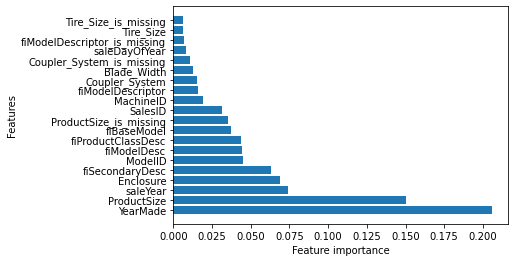

In [191]:
from importlib import reload
import utils
reload(utils)
from utils import plot_feature_importance
plot_feature_importance(X_train.columns,
                        best_model["Tuned RandomForestRegressor"].feature_importances_);